Importing libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and processing

In [ ]:
#loading csv file and printing top and bottom vales
golddata=pd.read_csv('/content/data.csv')
golddata.head()

,Year,Week,GLD
0,2018,Week 1,29667
1,2018,Week 2,29550
2,2018,Week 3,29550
3,2018,Week 4,29876
4,2018,Week 5,29678


In [ ]:
golddata.tail()

,Year,Week,GLD
301,2023,Week 42,61220
302,2023,Week 43,63500
303,2023,Week 44,62935
304,2023,Week 45,62325
305,2023,Week 46,62560


In [ ]:
#Number of row and column
golddata.shape

(306, 3)

In [ ]:
#information about the data
golddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    306 non-null    int64 
 1   Week    306 non-null    object
 2   GLD     306 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.3+ KB


In [ ]:
#checking missing values
golddata.isnull().sum()

Year    0
Week    0
GLD     0
dtype: int64

In [ ]:
# Statistical measures

golddata.describe()

,Year,GLD
count,306.000000,306.000000
mean,2020.450980,43418.343137
std,1.690634,9888.969542
min,2018.000000,29550.000000
25%,2019.000000,33407.000000
50%,2020.000000,47593.500000
75%,2022.000000,50758.000000
max,2023.000000,63500.000000


In [ ]:
 #correlation
correlation=golddata.corr()

<ipython-input-9-ab483017fcc9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=golddata.corr()


<Axes: >

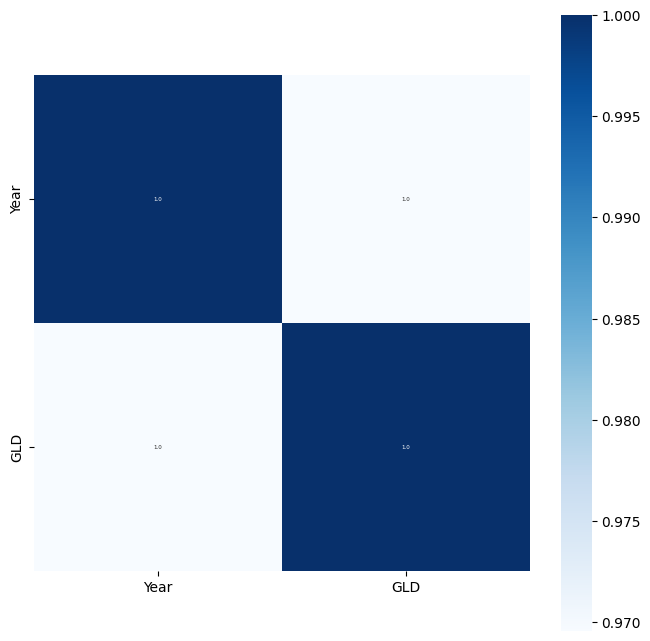

In [ ]:
#constructing heatmap
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True,annot_kws={'size':4}, cmap='Blues')

In [ ]:
#correlation of GLD
print(correlation['GLD'])

Year    0.969565
GLD     1.000000
Name: GLD, dtype: float64


<ipython-input-12-1071fa3275ad>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(golddata['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

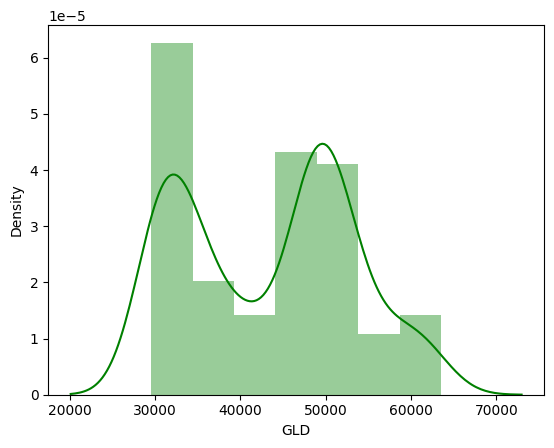

In [ ]:
#distribution of GLD

sns.distplot(golddata['GLD'],color='green')

Splitting


In [ ]:
X=golddata.drop(['Week','GLD'],axis=1)
Y=golddata['GLD']
print(X)
print(Y)

     Year
0    2018
1    2018
2    2018
3    2018
4    2018
..    ...
301  2023
302  2023
303  2023
304  2023
305  2023

[306 rows x 1 columns]
0      29667
1      29550
2      29550
3      29876
4      29678
       ...  
301    61220
302    63500
303    62935
304    62325
305    62560
Name: GLD, Length: 306, dtype: int64


Data Training and Testing

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

Training :Random forest

In [ ]:
regressor=RandomForestRegressor(n_estimators=10)
#training
regressor.fit(X_train,Y_train)
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

Data prepartion

In [ ]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[57955.70191166 48360.25304859 41653.72388012 30288.0558799
 33400.07156127 57955.70191166 30288.0558799  30288.0558799
 48360.25304859 30288.0558799  51141.34525627 33400.07156127
 41653.72388012 48360.25304859 48360.25304859 48360.25304859
 51141.34525627 51141.34525627 33400.07156127 51141.34525627
 41653.72388012 41653.72388012 33400.07156127 41653.72388012
 51141.34525627 30288.0558799  51141.34525627 48360.25304859
 51141.34525627 30288.0558799  41653.72388012 48360.25304859
 30288.0558799  51141.34525627 48360.25304859 48360.25304859
 41653.72388012 51141.34525627 57955.70191166 51141.34525627
 33400.07156127 41653.72388012 41653.72388012 33400.07156127
 48360.25304859 51141.34525627 48360.25304859 41653.72388012
 41653.72388012 30288.0558799  30288.0558799  51141.34525627
 33400.07156127 41653.72388012 41653.72388012 33400.07156127
 48360.25304859 33400.07156127 48360.25304859 51141.34525627
 57955.70191166 57955.70191166]


In [ ]:
model=RandomForestRegressor(n_estimators=100,max_features=3,random_state=1)

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared error is",error_score)

R squared error is 0.9486441137175055


In [ ]:
#comparing
Y_test = list(Y_test)
lin_model.fit(X_train,Y_train)
model.fit(X_train,Y_train)

RandomForestRegressor(max_features=3, random_state=1)

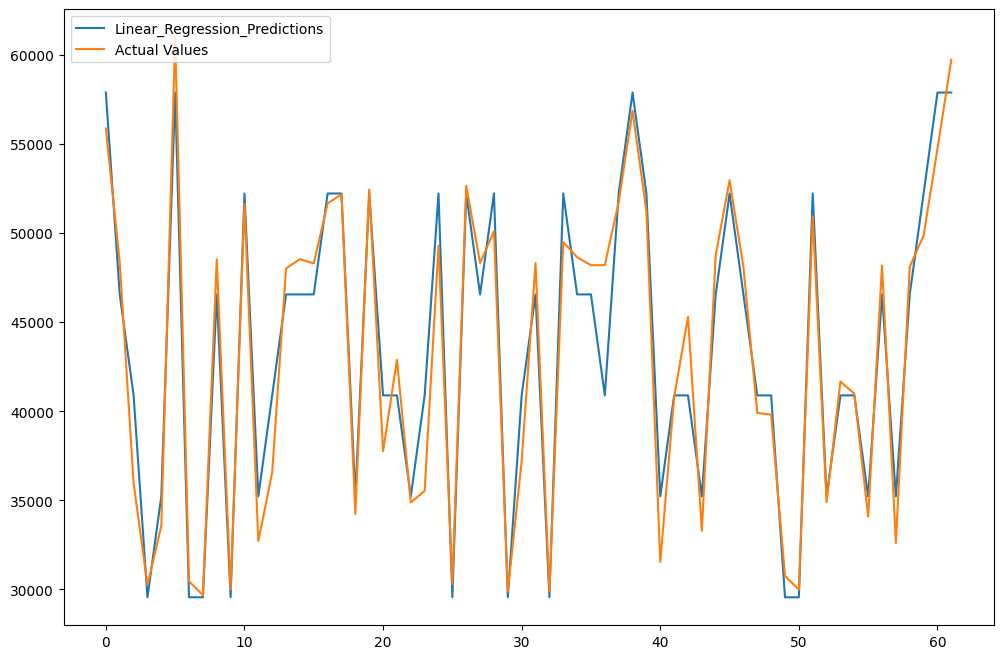

In [ ]:
lin_pred=lin_model.predict(X_test)
plt.rcParams["figure.figsize"]=(12,8)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(Y_test,label='Actual Values')
plt.legend(loc='upper left')
plt.show()


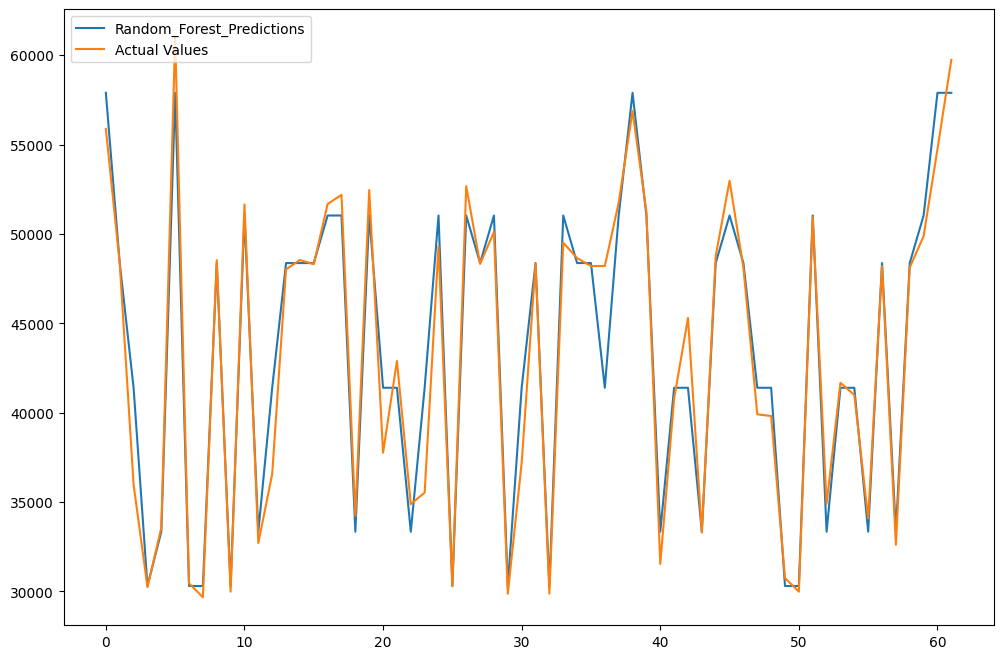

In [ ]:
pred=model.predict(X_test)
plt.rcParams["figure.figsize"]=(12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(Y_test,label='Actual Values')
plt.legend(loc='upper left')
plt.show()

In [ ]:
from math import sqrt
result1=sqrt(metrics.mean_squared_error(pred,Y_test))
result2=sqrt(metrics.mean_squared_error(lin_pred,Y_test))
per1=100-(result1/100)
per2=100-(result2/100)
if result1<result2:
  print("Gold rate will has a chance of ",str(per1)+" %")
else:
  print("Gold rate will has a chance of ",str(per2) + " %" )

Gold rate will has a chance of  80.08488527728923 %


[*********************100%%**********************]  1 of 1 completed
Predicted gold price for next year: 61433.19


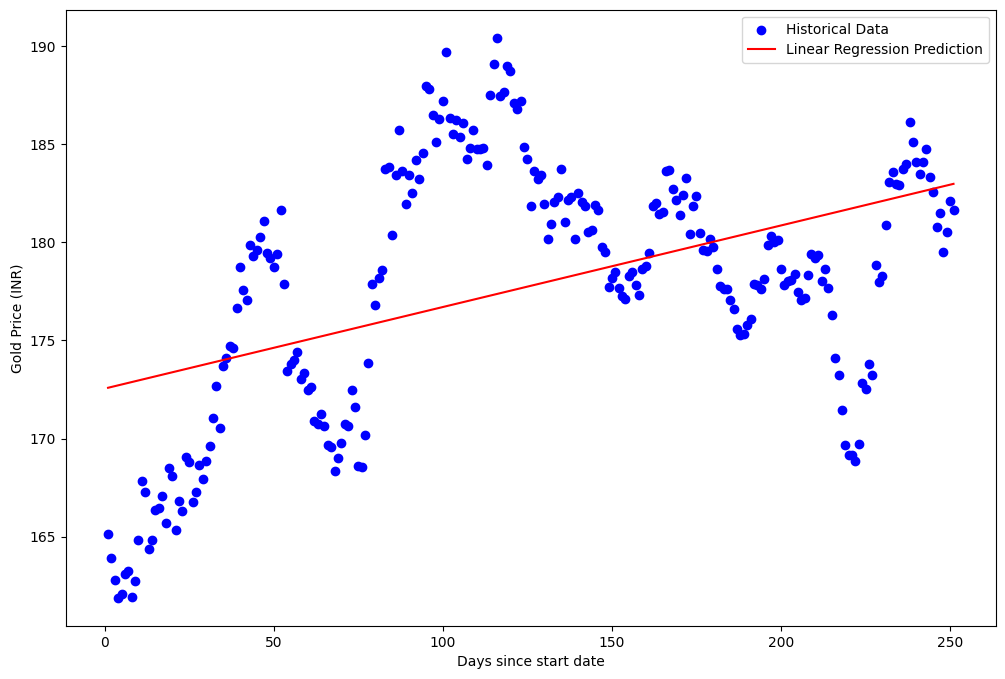

In [ ]:
from datetime import datetime, timedelta
import yfinance as yf
gold_ticker = 'GLD'
start_date = datetime.now() - timedelta(days=365)
end_date = datetime.now()
gold_data = yf.download(gold_ticker, start=start_date, end=end_date)
gold_data = gold_data['Close'].dropna()
dates = np.arange(1, len(gold_data) + 1).reshape(-1, 1)
prices = gold_data.values.reshape(-1, 1)
model = LinearRegression()
model.fit(dates, prices)
next_year_date = len(gold_data) + 365
next_year_price = model.predict(np.array(next_year_date).reshape(-1, 1))
print(f"Predicted gold price for next year: {next_year_price[0][0]*310:.2f}")
plt.scatter(dates, prices, color='blue', label='Historical Data')
plt.plot(dates, model.predict(dates), color='red', label='Linear Regression Prediction')
plt.xlabel('Days since start date')
plt.ylabel('Gold Price (INR)')
plt.legend()
plt.show()